In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset Prepare

In [2]:
import pandas as pd
import numpy as np
import os

# Define the directory containing all CSV files
directory = '/content/drive/MyDrive/Soccer Player Injury Prediction/Datasets/Subjective Dataset/Data'

# List of CSV files
file_names = ['acwr.csv', 'atl.csv', 'ctl28.csv', 'ctl42.csv', 'daily_load.csv', 'fatigue.csv',
              'monotony.csv', 'mood.csv', 'readiness.csv', 'sleep_duration.csv', 'sleep_quality.csv',
              'soreness.csv', 'strain.csv', 'stress.csv', 'weekly_load.csv'] # 'injury_ts.csv',

# Initialize an empty DataFrame to store the concatenated columns
concatenated_columns_df = pd.DataFrame()

# Iterate over each CSV file and concatenate its columns into a single column
for file_name in file_names:
    file_path = os.path.join(directory, file_name)
    df = pd.read_csv(file_path)  # Read CSV file
    # Drop the first column
    df = df.iloc[:, 1:]
    # Concatenate remaining columns into a single column with the file name as the column name
    concatenated_columns_df[file_name.split('.')[0]] = df.values.flatten()

concatenated_columns_df

,acwr,atl,ctl28,ctl42,daily_load,fatigue,monotony,mood,readiness,sleep_duration,sleep_quality,soreness,strain,stress,weekly_load
0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
1,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
2,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
3,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
4,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36545,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
36546,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
36547,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
36548,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0


In [3]:
# Read the first CSV file to get the date column
first_csv_path = os.path.join(directory, file_names[0])
first_df = pd.read_csv(first_csv_path)
dates = first_df.iloc[:, 0].values  # Extract dates as a NumPy array
# Number of times to repeat
repeat_times = 49
# Repeat the array
dates = np.tile(dates, repeat_times)

# Create a dictionary with dates
dates_dict = {'Date': dates}
# Repeat the dictionary for the number of CSV files
dates_df = pd.DataFrame({key: pd.Series(value) for key, value in dates_dict.items()})

# Extract column names into a list
player_names = first_df.columns.tolist()

# Drop the first element from the list
player_names.pop(0)

# Convert the modified list into a NumPy array
player_names_array = np.array(player_names)
# Repeat each element three times
player_names = np.repeat(player_names_array, 731)

# Create a dictionary with player names
player_names_dict = {'player_names': player_names}
# Repeat the dictionary for the number of CSV files
player_names_df = pd.DataFrame({key: pd.Series(value) for key, value in player_names_dict.items()})

# Concatenate the date column with the concatenated data
final_df = pd.concat([dates_df, player_names_df, concatenated_columns_df], axis=1)

final_df

,Date,player_names,acwr,atl,ctl28,ctl42,daily_load,fatigue,monotony,mood,readiness,sleep_duration,sleep_quality,soreness,strain,stress,weekly_load
0,01.01.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
1,02.01.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
2,03.01.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
3,04.01.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
4,05.01.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36545,NaN,TeamB-08e35b7b-d2ad-411f-a0de-4e663f14c3c3,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
36546,NaN,TeamB-08e35b7b-d2ad-411f-a0de-4e663f14c3c3,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
36547,NaN,TeamB-08e35b7b-d2ad-411f-a0de-4e663f14c3c3,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
36548,NaN,TeamB-08e35b7b-d2ad-411f-a0de-4e663f14c3c3,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0


In [4]:
df1 = final_df
file_path = os.path.join(directory, 'game-performance.csv')
df2 = pd.read_csv(file_path)
df2.rename(columns={'player_name': 'player_names'}, inplace=True)
df2.rename(columns={'timestamp': 'Date'}, inplace=True)
columns_to_keep = ['player_names', 'Date', 'team_performance', 'offensive_performance',	'defensive_performance']
df2 = df2[columns_to_keep]

# Merge df1 and df2 on 'Date' and 'player_names' using left join
merged_df = pd.merge(df1, df2[['Date', 'player_names', 'team_performance', 'offensive_performance', 'defensive_performance']],
                     on=['Date', 'player_names'], how='left')

# Fill NaN values with 0
# merged_df.fillna(0, inplace=True)

# Rename columns to differentiate between original and new columns
merged_df.rename(columns={'team_performance_y': 'team_performance',
                          'offensive_performance_y': 'offensive_performance',
                          'defensive_performance_y': 'defensive_performance'}, inplace=True)

# Drop original columns from df1
# merged_df.drop(['team_performance_x', 'offensive_performance_x', 'defensive_performance_x'], axis=1, inplace=True)

final_df = merged_df
final_df

,Date,player_names,acwr,atl,ctl28,ctl42,daily_load,fatigue,monotony,mood,readiness,sleep_duration,sleep_quality,soreness,strain,stress,weekly_load,team_performance,offensive_performance,defensive_performance
0,01.01.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
1,02.01.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2,03.01.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
3,04.01.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
4,05.01.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36546,NaN,TeamB-08e35b7b-d2ad-411f-a0de-4e663f14c3c3,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
36547,NaN,TeamB-08e35b7b-d2ad-411f-a0de-4e663f14c3c3,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
36548,NaN,TeamB-08e35b7b-d2ad-411f-a0de-4e663f14c3c3,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
36549,NaN,TeamB-08e35b7b-d2ad-411f-a0de-4e663f14c3c3,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN


In [5]:
final_df['team_performance'].value_counts()

team_performance
7.0     77
5.0     40
6.0     39
8.0     32
4.0     18
3.0     15
9.0     15
10.0     6
1.0      1
2.0      1
Name: count, dtype: int64

In [6]:
def addNewDf(filename, datecolumn, newcolumn):
  df1 = final_df
  file_path = os.path.join(directory, filename)
  df2 = pd.read_csv(file_path)
  df2.rename(columns={'player_name': 'player_names'}, inplace=True)
  columns_to_keep = ['player_names', datecolumn]
  df2 = df2[columns_to_keep]

  # Merge df1 and df2 based on both 'Date' and 'player_names'
  merged_df = pd.merge(df1, df2, left_on=['Date', 'player_names'], right_on=[datecolumn, 'player_names'], how='left')

  # Fill NaN values with 0 in case there's no match
  merged_df['timestamp'].fillna(0, inplace=True)

  # Update new column based on match
  merged_df[newcolumn] = (merged_df['timestamp'] != 0).astype(int)

  # Drop the 'timestamp' column as it's not needed anymore
  merged_df.drop('timestamp', axis=1, inplace=True)

  return merged_df

final_df = addNewDf('illness.csv', 'timestamp', 'illness')

In [7]:
final_df = addNewDf('injury.csv', 'timestamp', 'injury')

### Team Checking

In [8]:
# Function to extract team name from player_names
def extract_team_name(player_name):
    return player_name.split('-')[0]

# Create a new column 'Team' by applying the function to 'player_names' column
final_df['Team'] = final_df['player_names'].apply(lambda x: extract_team_name(x))

final_df

,Date,player_names,acwr,atl,ctl28,ctl42,daily_load,fatigue,monotony,mood,...,soreness,strain,stress,weekly_load,team_performance,offensive_performance,defensive_performance,illness,injury,Team
0,01.01.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,TeamA
1,02.01.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,TeamA
2,03.01.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,TeamA
3,04.01.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,TeamA
4,05.01.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,TeamA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36552,NaN,TeamB-08e35b7b-d2ad-411f-a0de-4e663f14c3c3,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,TeamB
36553,NaN,TeamB-08e35b7b-d2ad-411f-a0de-4e663f14c3c3,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,TeamB
36554,NaN,TeamB-08e35b7b-d2ad-411f-a0de-4e663f14c3c3,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,TeamB
36555,NaN,TeamB-08e35b7b-d2ad-411f-a0de-4e663f14c3c3,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,TeamB


In [9]:
final_df['Team'].value_counts()

Team
TeamA    19741
TeamB    16816
Name: count, dtype: int64

## Data Preprocessing

In [10]:
df = final_df
df.head(5)

,Date,player_names,acwr,atl,ctl28,ctl42,daily_load,fatigue,monotony,mood,...,soreness,strain,stress,weekly_load,team_performance,offensive_performance,defensive_performance,illness,injury,Team
0,01.01.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,TeamA
1,02.01.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,TeamA
2,03.01.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,TeamA
3,04.01.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,TeamA
4,05.01.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,TeamA


In [11]:
# Get the count of rows and columns
num_rows, num_columns = df.shape

# Print the count of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

# Print all column names
print("Column Names:")
print(df.columns)

# Check if any row contains NaN value in every column
nan_rows = df[df.isna().all(axis=1)]

if len(nan_rows) > 0:
    print("\nRows with NaN values in every column:")
    print(nan_rows)
else:
    print("\nNo rows with NaN values in every column.")

Number of rows: 36557
Number of columns: 23
Column Names:
Index(['Date', 'player_names', 'acwr', 'atl', 'ctl28', 'ctl42', 'daily_load',
       'fatigue', 'monotony', 'mood', 'readiness', 'sleep_duration',
       'sleep_quality', 'soreness', 'strain', 'stress', 'weekly_load',
       'team_performance', 'offensive_performance', 'defensive_performance',
       'illness', 'injury', 'Team'],
      dtype='object')

No rows with NaN values in every column.


### Null Values Handleing

In [12]:
# Count NaN values in each column
nan_counts = df.isna().sum()

# Print count of NaN values in each column
print("Count of NaN values in each column:")
print(nan_counts)

Count of NaN values in each column:
Date                       731
player_names                 0
acwr                         0
atl                          0
ctl28                        0
ctl42                        0
daily_load                   0
fatigue                  19564
monotony                     0
mood                     19557
readiness                19559
sleep_duration           19575
sleep_quality            19562
soreness                 19557
strain                       0
stress                   19559
weekly_load                  0
team_performance         36313
offensive_performance    36313
defensive_performance    36313
illness                      0
injury                       0
Team                         0
dtype: int64


In [13]:
team_b_df = df[df['Team'] == 'TeamA']
nan_counts_team_a = team_b_df.isna().sum()
print("Count of NaN values in each column for TeamA:")
print(nan_counts_team_a)

Count of NaN values in each column for TeamA:
Date                         0
player_names                 0
acwr                         0
atl                          0
ctl28                        0
ctl42                        0
daily_load                   0
fatigue                  11958
monotony                     0
mood                     11956
readiness                11959
sleep_duration           11955
sleep_quality            11959
soreness                 11954
strain                       0
stress                   11957
weekly_load                  0
team_performance         19580
offensive_performance    19580
defensive_performance    19580
illness                      0
injury                       0
Team                         0
dtype: int64


In [14]:
team_b_df = df[df['Team'] == 'TeamB']
nan_counts_team_b = team_b_df.isna().sum()
print("Count of NaN values in each column for TeamB:")
print(nan_counts_team_b)

Count of NaN values in each column for TeamB:
Date                       731
player_names                 0
acwr                         0
atl                          0
ctl28                        0
ctl42                        0
daily_load                   0
fatigue                   7606
monotony                     0
mood                      7601
readiness                 7600
sleep_duration            7620
sleep_quality             7603
soreness                  7603
strain                       0
stress                    7602
weekly_load                  0
team_performance         16733
offensive_performance    16733
defensive_performance    16733
illness                      0
injury                       0
Team                         0
dtype: int64


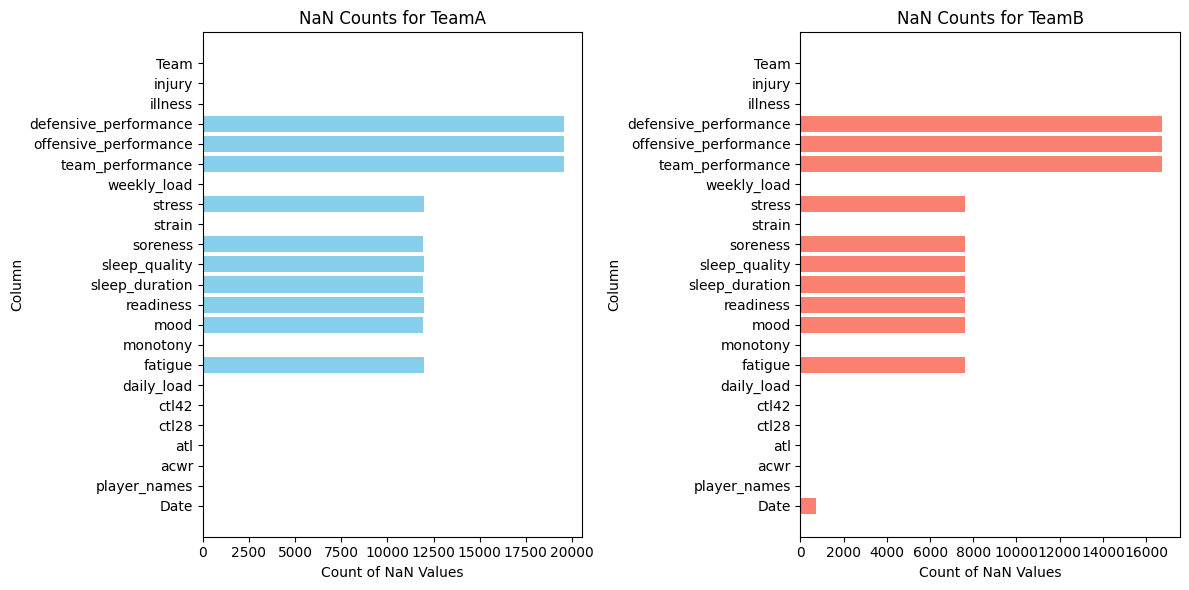

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


# Get NaN counts for each column for TeamA
teamA_nan_counts = df[df['Team'] == 'TeamA'].isnull().sum()

# Get NaN counts for each column for TeamB
teamB_nan_counts = df[df['Team'] == 'TeamB'].isnull().sum()

# Create DataFrames for plotting
teamA_nan_counts_df = pd.DataFrame({'Column': teamA_nan_counts.index, 'NaN_Count': teamA_nan_counts.values})
teamB_nan_counts_df = pd.DataFrame({'Column': teamB_nan_counts.index, 'NaN_Count': teamB_nan_counts.values})

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot NaN counts for TeamA
axes[0].barh(teamA_nan_counts_df['Column'], teamA_nan_counts_df['NaN_Count'], color='skyblue')
axes[0].set_title('NaN Counts for TeamA')
axes[0].set_xlabel('Count of NaN Values')
axes[0].set_ylabel('Column')

# Plot NaN counts for TeamB
axes[1].barh(teamB_nan_counts_df['Column'], teamB_nan_counts_df['NaN_Count'], color='salmon')
axes[1].set_title('NaN Counts for TeamB')
axes[1].set_xlabel('Count of NaN Values')
axes[1].set_ylabel('Column')

plt.tight_layout()
plt.show()


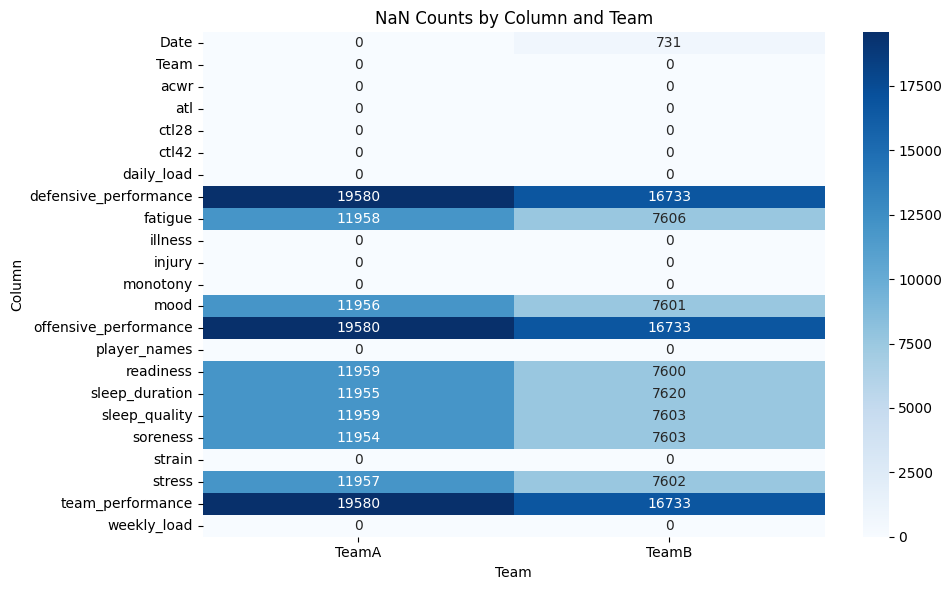

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have imported pandas as pd and have your DataFrame df ready

# Filter DataFrame for TeamA and TeamB
teamA_nan_counts = df[df['Team'] == 'TeamA'].isnull().sum()
teamB_nan_counts = df[df['Team'] == 'TeamB'].isnull().sum()

# Reshape the DataFrames for plotting
teamA_nan_counts = teamA_nan_counts.reset_index().rename(columns={'index': 'Column', 0: 'NaN_Count'})
teamB_nan_counts = teamB_nan_counts.reset_index().rename(columns={'index': 'Column', 0: 'NaN_Count'})

# Concatenate DataFrames
combined_nan_counts = pd.concat([teamA_nan_counts.assign(Team='TeamA'), teamB_nan_counts.assign(Team='TeamB')])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(combined_nan_counts.pivot_table(index='Column', columns='Team', values='NaN_Count'), cmap="Blues", annot=True, fmt='d')
plt.title('NaN Counts by Column and Team')
plt.xlabel('Team')
plt.ylabel('Column')
plt.tight_layout()
plt.show()

In [17]:
df = df.dropna(subset=['Date']) # Dropping Dates
df.isna().sum()

Date                         0
player_names                 0
acwr                         0
atl                          0
ctl28                        0
ctl42                        0
daily_load                   0
fatigue                  19011
monotony                     0
mood                     19004
readiness                19006
sleep_duration           19021
sleep_quality            19009
soreness                 19004
strain                       0
stress                   19006
weekly_load                  0
team_performance         35582
offensive_performance    35582
defensive_performance    35582
illness                      0
injury                       0
Team                         0
dtype: int64

In [18]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam

# # Assuming you have your DataFrame named 'final_df' with NaN values

# # Select columns with missing values
# columns_with_missing_values = ['fatigue', 'mood', 'readiness', 'sleep_duration', 'sleep_quality',
#                                'soreness', 'stress', 'team_performance', 'offensive_performance',
#                                'defensive_performance']

# # Create a copy of the dataframe with only the selected columns
# df_selected_columns = df[columns_with_missing_values].copy()

# # Convert NaN values to a unique number (-1) to distinguish them from other values
# df_selected_columns.fillna(-1, inplace=True)

# # Split the data into features (X) and target (y)
# X = df_selected_columns.dropna(axis=1).values  # Use columns without NaN values as features
# y = df_selected_columns.values  # Missing values will be the target to predict

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Build a simple feedforward neural network
# model = Sequential([
#     Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
#     Dense(128, activation='relu'),
#     Dense(64, activation='relu'),
#     Dense(X_train_scaled.shape[1])  # Output layer with same number of neurons as input features
# ])

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')  # Mean squared error loss for regression

# # Train the model
# model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)  # Adjust epochs and batch size as needed

# # Predict missing values for test set
# y_pred_scaled = model.predict(X_test_scaled)

# # Inverse scaling to get the predicted missing values
# y_pred = scaler.inverse_transform(y_pred_scaled)

# # Convert predicted missing values back to original dataframe
# df_predicted_values = pd.DataFrame(y_pred, columns=columns_with_missing_values)

# # Replace original NaN values with predicted values
# df[columns_with_missing_values] = df[columns_with_missing_values].fillna(df_predicted_values)

# df.isna().sum()

In [19]:
# Check if all Features columns are NaN and 'injury' is 0 togther
condition = df[['fatigue', 'mood', 'readiness', 'sleep_duration', 'sleep_quality', 'soreness', 'stress',
               'team_performance', 'offensive_performance', 'defensive_performance']].isnull().all(axis=1) & (df['injury'] == 0)

# Count the number of rows that meet the condition
print(condition.sum())

df = df.drop(df[condition].index)

df.isna().sum()

18734


Date                         0
player_names                 0
acwr                         0
atl                          0
ctl28                        0
ctl42                        0
daily_load                   0
fatigue                    277
monotony                     0
mood                       270
readiness                  272
sleep_duration             287
sleep_quality              275
soreness                   270
strain                       0
stress                     272
weekly_load                  0
team_performance         16848
offensive_performance    16848
defensive_performance    16848
illness                      0
injury                       0
Team                         0
dtype: int64

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Initialize the RandomForestImputer
imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)

# Specify the columns you want to impute (if needed)
columns_to_impute = ['fatigue', 'mood', 'readiness', 'sleep_duration', 'sleep_quality', 'soreness', 'stress',
                     'team_performance', 'offensive_performance', 'defensive_performance']

# Perform Random Forest imputation on the specified columns
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

df.isna().sum()

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Date                     0
player_names             0
acwr                     0
atl                      0
ctl28                    0
ctl42                    0
daily_load               0
fatigue                  0
monotony                 0
mood                     0
readiness                0
sleep_duration           0
sleep_quality            0
soreness                 0
strain                   0
stress                   0
weekly_load              0
team_performance         0
offensive_performance    0
defensive_performance    0
illness                  0
injury                   0
Team                     0
dtype: int64

In [21]:
# from sklearn.impute import KNNImputer

# # Initialize the KNNImputer
# imputer = KNNImputer(n_neighbors=22)  # the number of neighbors is adjustable as needed

# # Specify the columns you want to impute (if needed)
# columns_to_impute = ['fatigue', 'mood', 'readiness', 'sleep_duration', 'sleep_quality', 'soreness', 'stress',
#                      'team_performance', 'offensive_performance', 'defensive_performance']

# # Perform KNN imputation on the specified columns
# df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# df.isna().sum()

In [22]:
# # Replace all NaN values with 0 in every column
# df.fillna(0, inplace=True)
# print("Count of NaN values in each column:")
# print(df.isna().sum())

In [23]:
# Printing column names
print(df.columns)

Index(['Date', 'player_names', 'acwr', 'atl', 'ctl28', 'ctl42', 'daily_load',
       'fatigue', 'monotony', 'mood', 'readiness', 'sleep_duration',
       'sleep_quality', 'soreness', 'strain', 'stress', 'weekly_load',
       'team_performance', 'offensive_performance', 'defensive_performance',
       'illness', 'injury', 'Team'],
      dtype='object')


In the process of developing the dataset for analysis, multiple CSV files containing various features were merged, with each file representing a distinct aspect of player performance and well-being. Additionally, the player names were leveraged to derive team information, thereby enhancing the dataset's comprehensiveness. However, during the data preprocessing stage, it was observed that numerous null values were present across different rows. While the distribution of null values between Team A and Team B appeared to be approximately uniform, some rows contained null date values, which were deemed potentially problematic for outlier generation and thus were dropped from the dataset. Despite their minimal occurrence, the elimination of these rows contributed to ensuring data integrity. Furthermore, certain rows exhibited null values across multiple features simultaneously, coinciding with an absence of reported injuries. Given the non-critical nature of these instances, such rows were excluded from further analysis to mitigate potential data skewing. Consequently, approximately half of the initial null value counts were effectively reduced. To address the remaining null values, a Random Forest Imputer was employed, successfully resolving all null value issues and culminating in a clean and comprehensive dataset ready for subsequent analysis. This meticulous data preprocessing approach ensures the reliability and validity of the dataset, laying a solid foundation for insightful analysis and robust conclusions in the ensuing research endeavors.

In [24]:
# df.to_csv("injury.csv")

In [25]:
df

,Date,player_names,acwr,atl,ctl28,ctl42,daily_load,fatigue,monotony,mood,...,soreness,strain,stress,weekly_load,team_performance,offensive_performance,defensive_performance,illness,injury,Team
192,11.07.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.000000,0.00,0.00,0.00,0.0,2.910000,0.00,2.48,...,2.41,0.0,2.50,0.0,7.00,5.00,6.00,0,0,TeamA
280,07.10.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.000000,0.00,0.00,0.00,0.0,2.696667,0.00,3.00,...,2.01,0.0,3.06,0.0,7.00,7.00,7.00,0,0,TeamA
291,18.10.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.000000,0.00,0.00,0.00,0.0,2.660000,0.00,4.45,...,3.31,0.0,4.16,0.0,5.00,7.00,5.00,0,0,TeamA
304,31.10.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.000000,0.00,0.00,0.00,0.0,3.070000,0.00,3.00,...,2.98,0.0,3.00,0.0,6.00,6.00,7.00,0,0,TeamA
311,07.11.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.000000,0.00,0.00,0.00,0.0,3.010000,0.00,2.87,...,2.78,0.0,2.76,0.0,4.00,4.00,4.00,0,0,TeamA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35813,19.12.2021,TeamB-6d568bee-175f-4dcb-9d3a-0f3e8f35de07,1.249163,268.57,215.00,230.48,0.0,3.000000,1.53,3.00,...,3.00,2876.4,3.00,1880.0,6.94,7.92,7.06,0,0,TeamB
35815,21.12.2021,TeamB-6d568bee-175f-4dcb-9d3a-0f3e8f35de07,1.367898,301.43,220.36,247.38,300.0,4.000000,1.15,3.00,...,1.00,2426.5,3.00,2110.0,6.08,5.86,6.41,0,0,TeamB
35818,24.12.2021,TeamB-6d568bee-175f-4dcb-9d3a-0f3e8f35de07,0.864501,354.29,409.82,393.69,450.0,2.000000,1.52,5.00,...,3.00,3769.6,5.00,2480.0,7.28,6.36,6.16,0,0,TeamB
35819,25.12.2021,TeamB-6d568bee-175f-4dcb-9d3a-0f3e8f35de07,1.940203,301.43,155.36,163.57,560.0,4.000000,0.83,4.00,...,3.00,1751.3,3.00,2110.0,6.46,6.06,6.62,0,0,TeamB


In [26]:
df_ = df[['Date', 'player_names']]
df_

duplicate_rows = df_[df_.duplicated()]

# Display duplicate rows
print("All Duplicate Rows:")
print(duplicate_rows)


# duplicate_rows_specific_columns = df[df.duplicated(['Date', 'player_names'])]

# print("\nDuplicate Rows Based on Specific Columns:")
# print(duplicate_rows_specific_columns)


All Duplicate Rows:
             Date                                player_names
1543   21.03.2020  TeamA-5cd7a61b-88b2-46d2-94f8-5a0d4f682d93
2276   22.03.2020  TeamA-74afe68c-f348-414c-9754-6d6f9df12587
8855   21.03.2020  TeamA-3e5f6e2b-46b7-4890-84a9-3bbb2649af5a
9632   05.05.2020  TeamA-4051bba7-1170-4c43-b912-8c38815a7625
26346  26.01.2020  TeamB-4405bb1f-56f7-48ba-bfa8-e795e4006952
26347  26.01.2020  TeamB-4405bb1f-56f7-48ba-bfa8-e795e4006952
35714  11.09.2021  TeamB-6d568bee-175f-4dcb-9d3a-0f3e8f35de07


In [27]:
# Count the number of unique rows
unique_row_count = len(df_.drop_duplicates())

# Display the unique row count
print("Unique Row Count:", unique_row_count)

Unique Row Count: 17085


In [28]:
df = df.drop_duplicates()
df

,Date,player_names,acwr,atl,ctl28,ctl42,daily_load,fatigue,monotony,mood,...,soreness,strain,stress,weekly_load,team_performance,offensive_performance,defensive_performance,illness,injury,Team
192,11.07.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.000000,0.00,0.00,0.00,0.0,2.910000,0.00,2.48,...,2.41,0.0,2.50,0.0,7.00,5.00,6.00,0,0,TeamA
280,07.10.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.000000,0.00,0.00,0.00,0.0,2.696667,0.00,3.00,...,2.01,0.0,3.06,0.0,7.00,7.00,7.00,0,0,TeamA
291,18.10.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.000000,0.00,0.00,0.00,0.0,2.660000,0.00,4.45,...,3.31,0.0,4.16,0.0,5.00,7.00,5.00,0,0,TeamA
304,31.10.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.000000,0.00,0.00,0.00,0.0,3.070000,0.00,3.00,...,2.98,0.0,3.00,0.0,6.00,6.00,7.00,0,0,TeamA
311,07.11.2020,TeamA-d7299614-fa73-4f69-b5e9-f913e3154ff6,0.000000,0.00,0.00,0.00,0.0,3.010000,0.00,2.87,...,2.78,0.0,2.76,0.0,4.00,4.00,4.00,0,0,TeamA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35813,19.12.2021,TeamB-6d568bee-175f-4dcb-9d3a-0f3e8f35de07,1.249163,268.57,215.00,230.48,0.0,3.000000,1.53,3.00,...,3.00,2876.4,3.00,1880.0,6.94,7.92,7.06,0,0,TeamB
35815,21.12.2021,TeamB-6d568bee-175f-4dcb-9d3a-0f3e8f35de07,1.367898,301.43,220.36,247.38,300.0,4.000000,1.15,3.00,...,1.00,2426.5,3.00,2110.0,6.08,5.86,6.41,0,0,TeamB
35818,24.12.2021,TeamB-6d568bee-175f-4dcb-9d3a-0f3e8f35de07,0.864501,354.29,409.82,393.69,450.0,2.000000,1.52,5.00,...,3.00,3769.6,5.00,2480.0,7.28,6.36,6.16,0,0,TeamB
35819,25.12.2021,TeamB-6d568bee-175f-4dcb-9d3a-0f3e8f35de07,1.940203,301.43,155.36,163.57,560.0,4.000000,0.83,4.00,...,3.00,1751.3,3.00,2110.0,6.46,6.06,6.62,0,0,TeamB


In [29]:
df.to_csv("/content/drive/MyDrive/Soccer Player Injury Prediction/Datasets/Subjective Dataset/preprocessed.csv", index=False)

## Merge with GPS Data

In [30]:
df0 = pd.read_csv("/content/drive/MyDrive/Soccer Player Injury Prediction/Datasets/Complete Dataset/dataWithGPS.csv")
# df0 = df0.drop(columns=['Unnamed: 0'])
df0['Injury'] = None
df0['Acwr'] = None
df0['Atl'] = None
df0['Ctl28'] = None
df0['Ctl42'] = None
df0['Monotony'] = None
df0['Strain'] = None
df0['Team_performance'] = None
df0['Offensive_performance'] = None
df0['Defensive_performance'] = None
df0['Illness'] = None
df1 = df

In [31]:
from datetime import datetime

df0['date'] = pd.to_datetime(df0['date'], format='%Y-%m-%d').dt.strftime('%d.%m.%Y')
print(df0['date'][0])

01.06.2020


In [32]:
df10 = df1[['Date', 'player_names', 'injury', 'acwr', 'atl', 'ctl28', 'ctl42', 'monotony', 'strain', 'team_performance', 'offensive_performance', 'defensive_performance', 'illness']]
df11 = df0[['date', 'player_name_x', 'Injury', 'Acwr', 'Atl', 'Ctl28', 'Ctl42', 'Monotony', 'Strain', 'Team_performance', 'Offensive_performance', 'Defensive_performance', 'Illness']]

merged_df = pd.merge(df10, df11, left_on=['Date', 'player_names'], right_on=['date', 'player_name_x'], how='inner')

if not merged_df.empty:
    # Iterate over the rows and apply the conditional replacement
    for i, row in merged_df.iterrows():
        if row['Date'] == row['date'] and row['player_names'] == row['player_name_x']:
            # Replace value in 'Injury' column with value from 'injury' column
            merged_df.at[i, 'Injury'] = row['injury']
            df0.at[i, 'Acwr'] = row['acwr']
            df0.at[i, 'Atl'] = row['atl']
            df0.at[i, 'Ctl28'] = row['ctl28']
            df0.at[i, 'Ctl42'] = row['ctl42']
            df0.at[i, 'Monotony'] = row['monotony']
            df0.at[i, 'Strain'] = row['strain']
            df0.at[i, 'Team_performance'] = row['team_performance']
            df0.at[i, 'Offensive_performance'] = row['offensive_performance']
            df0.at[i, 'Defensive_performance'] = row['defensive_performance']
            df0.at[i, 'Illness'] = row['illness']


df0['Injury'] = merged_df['Injury']
df0 = df0.dropna(subset=['Injury'])
df0.reset_index(inplace=True, drop=True)
df0

,player_name_x,daily_load,fatigue,mood,readiness,sleep_duration,sleep_quality,soreness,stress,injury_ts,...,Acwr,Atl,Ctl28,Ctl42,Monotony,Strain,Team_performance,Offensive_performance,Defensive_performance,Illness
0,TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93,720.0,3.0,4.0,7.0,8.0,3.0,3.0,3.0,0.0,...,3.999682,125.71,31.43,20.95,0.41,360.8,4.28,4.26,4.7,0
1,TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93,800.0,3.0,3.0,6.0,8.0,3.0,3.0,3.0,0.0,...,4.000259,154.29,38.57,25.71,0.41,442.8,6.66,6.13,7.13,0
2,TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93,900.0,2.0,4.0,6.0,7.0,3.0,3.0,4.0,0.0,...,4.000523,152.86,38.21,25.48,0.41,438.7,7.36,6.75,7.07,0
3,TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93,200.0,3.0,3.0,6.0,7.0,3.0,3.0,3.0,0.0,...,3.999752,161.43,40.36,26.9,0.41,463.3,6.275556,5.85,5.9,0
4,TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93,720.0,3.0,3.0,6.0,7.0,2.0,3.0,3.0,0.0,...,4.000187,214.29,53.57,35.71,0.41,615.0,6.49,4.14,5.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8590,TeamB-48bfd4ea-e9e2-45b5-befc-3383cae87fdf,360.0,3.0,3.0,8.0,8.0,3.0,3.0,3.0,0.0,...,1.329184,304.29,228.93,240.24,1.16,2470.8,5.735556,6.23,7.26,0
8591,TeamB-48bfd4ea-e9e2-45b5-befc-3383cae87fdf,160.0,3.0,3.0,8.0,8.0,3.0,3.0,3.0,0.0,...,0.817655,324.29,396.61,390.6,1.4,3178.0,5.54,6.78,6.23,0
8592,TeamB-48bfd4ea-e9e2-45b5-befc-3383cae87fdf,0.0,3.0,3.0,8.0,8.0,3.0,3.0,3.0,0.0,...,2.079122,281.43,135.36,150.24,0.8,1576.0,6.22,5.11,5.39,0
8593,TeamB-48bfd4ea-e9e2-45b5-befc-3383cae87fdf,560.0,3.0,3.0,8.0,8.0,3.0,3.0,3.0,0.0,...,4.000376,212.86,53.21,66.9,0.83,1236.7,3.0,4.0,6.0,0


In [33]:
df0['Injury'].value_counts()

Injury
0    8539
1      56
Name: count, dtype: int64

In [34]:
# Print all column names
print("Column Names:")
print(df0.columns)

Column Names:
Index(['player_name_x', 'daily_load', 'fatigue', 'mood', 'readiness',
       'sleep_duration', 'sleep_quality', 'soreness', 'stress', 'injury_ts',
       'weekly_load', 'Team_name', 'Total_distance', 'Average_running_speed',
       'Top_speed', 'HIR', 'date', 'Injury', 'Acwr', 'Atl', 'Ctl28', 'Ctl42',
       'Monotony', 'Strain', 'Team_performance', 'Offensive_performance',
       'Defensive_performance', 'Illness'],
      dtype='object')


In [35]:
# Print all column names
print("Column Names:")
print(df1.columns)

Column Names:
Index(['Date', 'player_names', 'acwr', 'atl', 'ctl28', 'ctl42', 'daily_load',
       'fatigue', 'monotony', 'mood', 'readiness', 'sleep_duration',
       'sleep_quality', 'soreness', 'strain', 'stress', 'weekly_load',
       'team_performance', 'offensive_performance', 'defensive_performance',
       'illness', 'injury', 'Team'],
      dtype='object')


In [36]:
# df0['acwr'] = None
# df0['atl'] = None
# df0['ctl28'] = None
# df0['ctl42'] = None
# df0['monotony'] = None
# df0['strain'] = None
# df0['team_performance'] = None
# df0['offensive_performance'] = None
# df0['defensive_performance'] = None
# df0['illness'] = None

# # Iterate over the rows of df0
# for i, row in df0.iterrows():
#     date_condition = df1['Date'] == row['date']
#     name_condition = df1['player_names'] == row['player_name_x']

#     # Find the index of matching rows in df1
#     match_index = df1[date_condition & name_condition].index

#     # Check if there is a match
#     if not match_index.empty:
#         # Update columns in df0 with the corresponding value from df1
#         df0.at[i, 'acwr'] = df1.at[match_index[0], 'acwr']
#         df0.at[i, 'atl'] = df1.at[match_index[0], 'atl']
#         df0.at[i, 'ctl28'] = df1.at[match_index[0], 'ctl28']
#         df0.at[i, 'ctl42'] = df1.at[match_index[0], 'ctl42']
#         df0.at[i, 'monotony'] = df1.at[match_index[0], 'monotony']
#         df0.at[i, 'strain'] = df1.at[match_index[0], 'strain']
#         df0.at[i, 'team_performance'] = df1.at[match_index[0], 'team_performance']
#         df0.at[i, 'offensive_performance'] = df1.at[match_index[0], 'offensive_performance']
#         df0.at[i, 'defensive_performance'] = df1.at[match_index[0], 'defensive_performance']
#         df0.at[i, 'illness'] = df1.at[match_index[0], 'illness']

In [37]:
df0

,player_name_x,daily_load,fatigue,mood,readiness,sleep_duration,sleep_quality,soreness,stress,injury_ts,...,Acwr,Atl,Ctl28,Ctl42,Monotony,Strain,Team_performance,Offensive_performance,Defensive_performance,Illness
0,TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93,720.0,3.0,4.0,7.0,8.0,3.0,3.0,3.0,0.0,...,3.999682,125.71,31.43,20.95,0.41,360.8,4.28,4.26,4.7,0
1,TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93,800.0,3.0,3.0,6.0,8.0,3.0,3.0,3.0,0.0,...,4.000259,154.29,38.57,25.71,0.41,442.8,6.66,6.13,7.13,0
2,TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93,900.0,2.0,4.0,6.0,7.0,3.0,3.0,4.0,0.0,...,4.000523,152.86,38.21,25.48,0.41,438.7,7.36,6.75,7.07,0
3,TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93,200.0,3.0,3.0,6.0,7.0,3.0,3.0,3.0,0.0,...,3.999752,161.43,40.36,26.9,0.41,463.3,6.275556,5.85,5.9,0
4,TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93,720.0,3.0,3.0,6.0,7.0,2.0,3.0,3.0,0.0,...,4.000187,214.29,53.57,35.71,0.41,615.0,6.49,4.14,5.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8590,TeamB-48bfd4ea-e9e2-45b5-befc-3383cae87fdf,360.0,3.0,3.0,8.0,8.0,3.0,3.0,3.0,0.0,...,1.329184,304.29,228.93,240.24,1.16,2470.8,5.735556,6.23,7.26,0
8591,TeamB-48bfd4ea-e9e2-45b5-befc-3383cae87fdf,160.0,3.0,3.0,8.0,8.0,3.0,3.0,3.0,0.0,...,0.817655,324.29,396.61,390.6,1.4,3178.0,5.54,6.78,6.23,0
8592,TeamB-48bfd4ea-e9e2-45b5-befc-3383cae87fdf,0.0,3.0,3.0,8.0,8.0,3.0,3.0,3.0,0.0,...,2.079122,281.43,135.36,150.24,0.8,1576.0,6.22,5.11,5.39,0
8593,TeamB-48bfd4ea-e9e2-45b5-befc-3383cae87fdf,560.0,3.0,3.0,8.0,8.0,3.0,3.0,3.0,0.0,...,4.000376,212.86,53.21,66.9,0.83,1236.7,3.0,4.0,6.0,0


In [38]:
column_mapping = {
    'Acwr': 'acwr',
    'Atl': 'atl',
    'Ctl28': 'ctl28',
    'Ctl42': 'ctl42',
    'Monotony': 'monotony',
    'Strain': 'strain',
    'Team_performance': 'team_performance',
    'Offensive_performance': 'offensive_performance',
    'Defensive_performance': 'defensive_performance',
    'Illness': 'illness',
    'Injury': 'injury', 'date': 'Date', 'player_name_x': 'player_names', 'Team_name': 'Team'
}

# Rename the columns
df0.rename(columns=column_mapping, inplace=True)

In [39]:
print(df0.columns)

Index(['player_names', 'daily_load', 'fatigue', 'mood', 'readiness',
       'sleep_duration', 'sleep_quality', 'soreness', 'stress', 'injury_ts',
       'weekly_load', 'Team', 'Total_distance', 'Average_running_speed',
       'Top_speed', 'HIR', 'Date', 'injury', 'acwr', 'atl', 'ctl28', 'ctl42',
       'monotony', 'strain', 'team_performance', 'offensive_performance',
       'defensive_performance', 'illness'],
      dtype='object')


In [40]:
df0.to_csv("/content/drive/MyDrive/Soccer Player Injury Prediction/Datasets/Complete Dataset/preprocessedWithGPS.csv", index=False)

In [41]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Soccer Player Injury Prediction/Datasets/Complete Dataset/preprocessedWithGPS.csv')
df.isna().sum()

player_names             0
daily_load               0
fatigue                  0
mood                     0
readiness                0
sleep_duration           0
sleep_quality            0
soreness                 0
stress                   0
injury_ts                0
weekly_load              0
Team                     0
Total_distance           0
Average_running_speed    0
Top_speed                0
HIR                      0
Date                     0
injury                   0
acwr                     0
atl                      0
ctl28                    0
ctl42                    0
monotony                 0
strain                   0
team_performance         0
offensive_performance    0
defensive_performance    0
illness                  0
dtype: int64